In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [5]:
# Load the data
df = pd.read_csv('data/tmdb-box-office-train.csv', 
                 index_col = 0,
                 parse_dates = ['release_date'])
df = df[(df['release_date'] > '2000') & (df['release_date'] < '2020')]
df = df.dropna(subset = ['runtime'])
df.head()

,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
id,,,,,,,,,,,,,,,,,,,,,
1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,...,2015-02-20,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,...,2004-08-06,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,...,2014-10-10,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,...,2012-03-09,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,...,2009-02-05,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


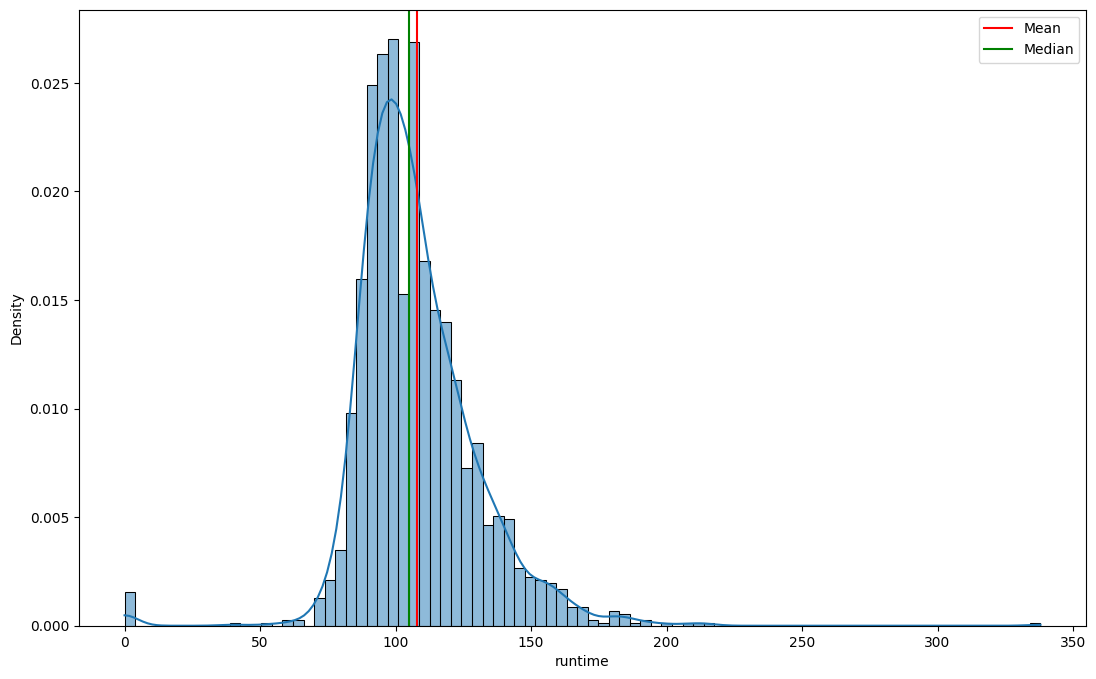

In [10]:
data = df['runtime'].copy()
mean = np.mean(data)
med = np.median(data)

fig, ax = plt.subplots(figsize = (13, 8));
sns.histplot(x = data, stat = 'density', kde = True, ax = ax);
ax.axvline(mean, color = 'red', label = 'Mean');
ax.axvline(med, color = 'green', label = 'Median');
ax.legend()

In [11]:
# Sample A
np.random.seed(42)
n = 20
sampleA = np.random.choice(data, size = n, replace = False)
sampleA

array([164.,  98., 113., 186.,  84., 114., 106.,  91., 125., 117.,  94.,
        90., 152.,  92.,  93.,  85., 116.,  87.,  87., 117.])

In [15]:
# Get descriptive statistics
sampleA_mean = np.mean(sampleA)
sampleA_med = np.median(sampleA)
sampleA_std = np.std(sampleA)

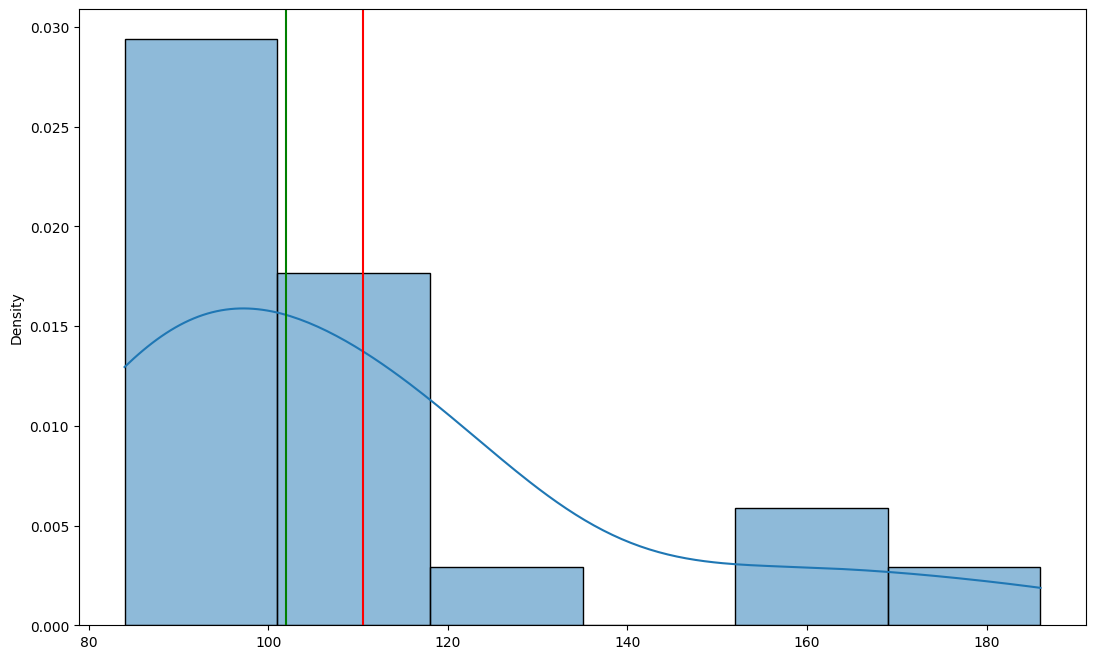

In [20]:
# Plot a histogram of sample A
fig, ax = plt.subplots(figsize = (13, 8));
sns.histplot(data = sampleA, stat = 'density', kde = True);
ax.axvline(sampleA_mean, color = 'red', label = f'Sample A Mean: {sampleA_mean: 0.2f}');
ax.axvline(sampleA_med, color = 'green', label = f'Sample A Media: {sampleA_med: 0.2f}');

In [21]:
stats.normaltest(sampleA)

NormaltestResult(statistic=9.734874928264695, pvalue=0.00769305377712739)

In [22]:
# Sample B
np.random.seed(32)
sampleB = np.random.choice(data, size = n, replace = False)
sampleB

array([125.,  87., 120.,  88., 121.,  90., 125., 109., 106., 165., 100.,
       107.,  91., 107., 129., 132., 100., 132.,  82., 107.])

In [24]:
sampleB_mean = np.mean(sampleB)
sampleB_med = np.median(sampleB)

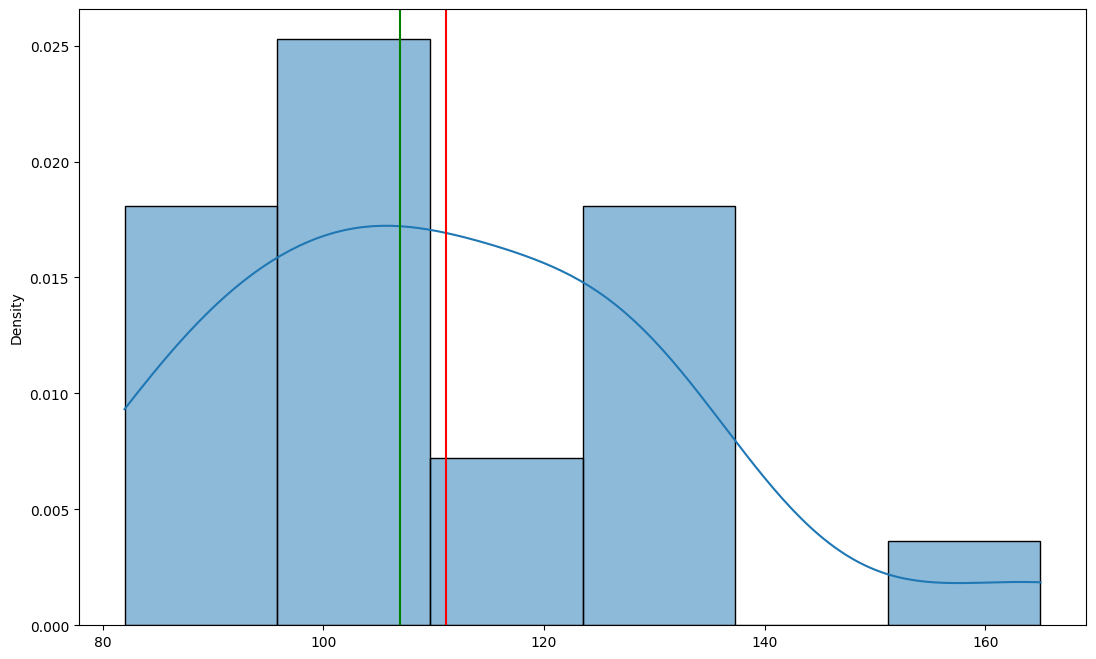

In [26]:
# Plot a histogram of sample B
fig, ax = plt.subplots(figsize = (13, 8));
sns.histplot(data = sampleB, stat = 'density', kde = True);
ax.axvline(sampleB_mean, color = 'red', label = f'Sample B Mean: {sampleB_mean: 0.2f}');
ax.axvline(sampleB_med, color = 'green', label = f'Sample B Media: {sampleB_med: 0.2f}');

In [27]:
stats.normaltest(sampleB)

NormaltestResult(statistic=3.879444116188468, pvalue=0.14374389667857196)

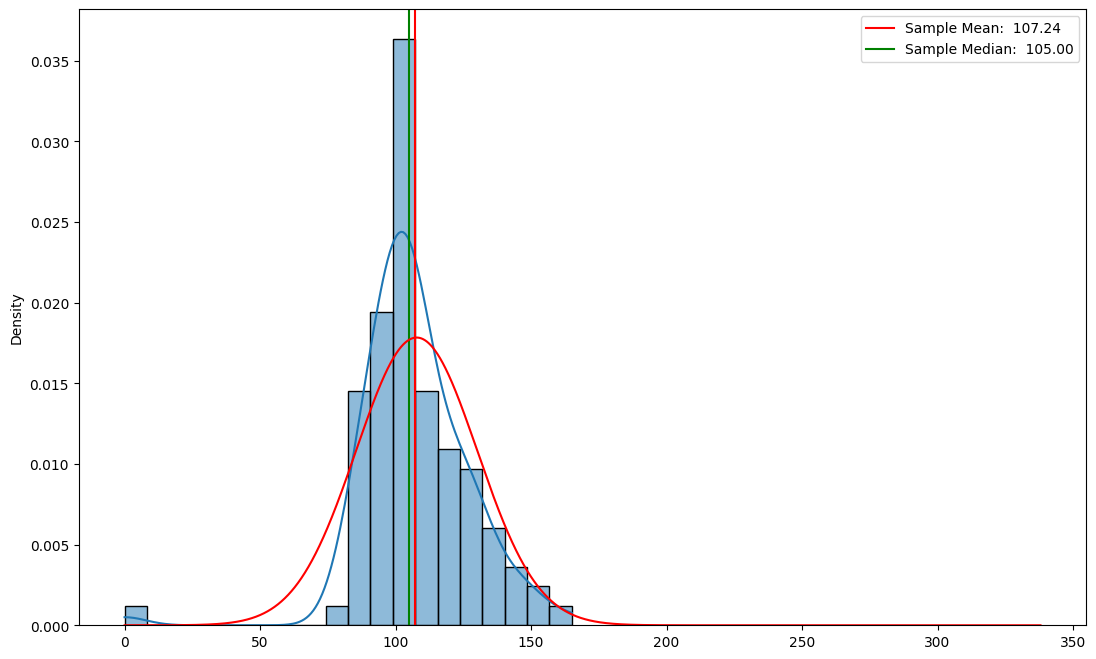

In [41]:
np.random.seed(32)
n = 100
sample = np.random.choice(data, size = n, replace = False)
sample_mean = np.mean(sample)
sample_med = np.median(sample)
sample_std = np.std(sample)
x_range = np.linspace(np.min(data), np.max(data), 10001)
pdf = stats.norm.pdf(x_range, loc = np.mean(data), scale = np.std(data))

fig, ax = plt.subplots(figsize = (13, 8));
sns.histplot(sample, stat = 'density', kde = True);
ax.axvline(sample_mean, label = f'Sample Mean: {sample_mean: 0.2f}', color = 'red',);
ax.axvline(sample_med, label = f'Sample Median: {sample_med: 0.2f}', color = 'green');
ax.plot(x_range, pdf, color = 'red')
ax.legend()

In [42]:
stats.normaltest(sample)

NormaltestResult(statistic=37.233728564765755, pvalue=8.218613776872242e-09)